In [5]:
import os
import pandas as pd
import json

## Loading the data and labeling it

In [6]:
sentiment_train = []
all_categories = []
reviews_train = []
scores_train = []
categories_train = []
for filename in os.listdir('data-nlp/training'):
    cat_name = filename.strip('train_').split('.')[0]
    all_categories.append(cat_name)
    with open(f'data-nlp/training/{filename}', 'r') as f:
        for line in f:
            l = json.loads(line)
            review = l['reviewText']
            reviews_train.append(review)
            sc = l['overall']
            categories_train.append(cat_name)
            if sc <= 2:
                sentiment_train.append("NEGATIVE")
            elif sc == 3:
                sentiment_train.append("NEUTRAL")
            else:
                sentiment_train.append("POSITIVE")

In [7]:
sentiment_test = []
reviews_test = []
scores_test = []
categories_test = []
for filename in os.listdir('data-nlp/training'):
    cat_name = filename.strip('train_').split('.')[0]
    with open(f'data-nlp/training/{filename}', 'r') as f:
        for line in f:
            l = json.loads(line)
            review = l['reviewText']
            reviews_test.append(review)
            sc = l['overall']
            categories_test.append(cat_name)
            if sc <= 2:
                sentiment_test.append("NEGATIVE")
            elif sc == 3:
                sentiment_test.append("NEUTRAL")
            else:
                sentiment_test.append("POSITIVE")

In [8]:
print(reviews_train[25])
print(categories_train[25])
print(sentiment_train[25])
len(categories_train)

Has the appearence of a well made unit.  Easily installed on an Audi TT.  Has been on the car for a few months without any issues.
Automotive
POSITIVE


22500

## Training different models and comparing them

### Converting text data into vector matrix using CountVectorizer library

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
vectorizer = CountVectorizer(binary = True)
train_x = vectorizer.fit_transform(reviews_train)
clf_svmcat = svm.SVC(kernel = 'linear')
clf_svmcat.fit(train_x, categories_train)

SVC(kernel='linear')

In [10]:
test_x = vectorizer.transform(reviews_test)
clf_svmcat.score(test_x, categories_test)

0.8720444444444444

In [11]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x.toarray(), categories_train)
clf_gnb.score(test_x.toarray(), categories_test)

0.7054666666666667

In [12]:
from sklearn.linear_model import LogisticRegression

clf_lg = LogisticRegression()
clf_lg.fit(train_x, categories_train)
clf_lg.score(test_x, categories_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8575111111111111

In [13]:
pred_y = clf_svmcat.predict(vectorizer.transform(['Friendly staff, huge variety of food treats and toys. Also you can meet Peaches the bird wo may even talk to you. Everyone should check it out']))
pred_y

array(['Pet_Supplies'], dtype='<U17')

### Training one model each for category prediction and sentiment prediction and analysing F1 scores

In [14]:
pred_y = clf_svmcat.predict(test_x)
from sklearn.metrics import f1_score
print('f1_score by category\n', all_categories)
print(f1_score(categories_test, pred_y, average = None, labels = all_categories))

f1_score by category
 ['Automotive', 'Beauty', 'Books', 'Clothing', 'Digital_Music', 'Electronics', 'Grocery', 'Patio_Lawn_Garden', 'Pet_Supplies']
[0.73249027 0.90340795 0.9600823  0.89636774 0.85925106 0.86130761
 0.91408064 0.84476844 0.91639802]


In [15]:
clf_svmsen = svm.SVC(kernel = 'linear')
clf_svmsen.fit(train_x, sentiment_train)
clf_svmsen.score(test_x, sentiment_test)

0.9814222222222222

In [16]:
pred_ysen = clf_svmsen.predict(test_x)
from sklearn.metrics import f1_score

print('f1_score by sentiments\n', ['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
print(f1_score(sentiment_test, pred_ysen, average = None, labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']))

f1_score by sentiments
 ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
[0.99017108 0.85604974 0.9451946 ]


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cmcat = confusion_matrix(categories_test, pred_y, labels = all_categories)
print(cmcat)

[[2259   33    1   30   77   35    5   55    5]
 [ 137 2240    5   25   69    7    6   11    0]
 [  50   10 2333    9   78    5    6    7    2]
 [ 167   22    3 2184   75   19   12   16    2]
 [ 102   29    3    9 2329    7    6   12    3]
 [ 295   21    5   31   78 2009   11   48    2]
 [ 151   44    5   32   78   10 2165   13    2]
 [ 336   26    3   34   79   39    8 1970    5]
 [ 171   34    2   19   58   34   18   32 2132]]


In [19]:
cmsen = confusion_matrix(sentiment_test, pred_ysen, labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
print(cmsen)

[[19997    12     3]
 [  268   895    20]
 [  114     1  1190]]


<AxesSubplot:>

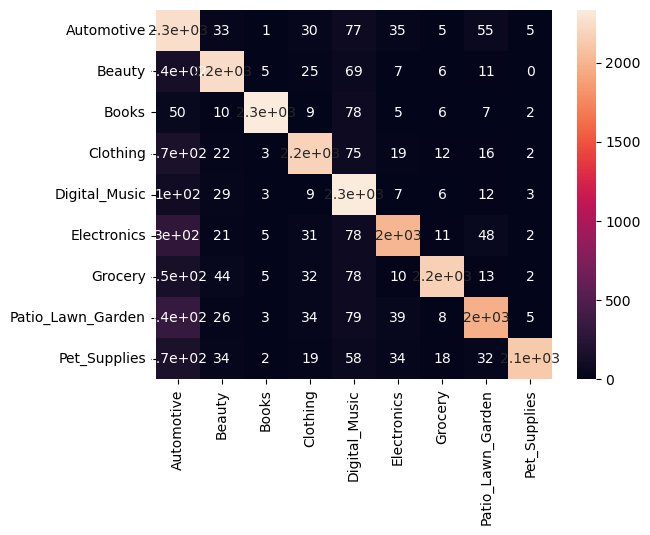

In [20]:
import matplotlib as plt
import seaborn as sns

sns.heatmap(cmcat, annot = True, xticklabels = all_categories, yticklabels = all_categories)

<AxesSubplot:>

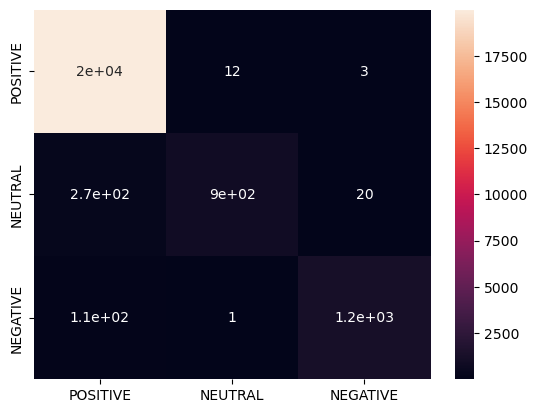

In [21]:
sns.heatmap(cmsen, annot = True, xticklabels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE'], yticklabels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE'])

In [22]:
def predict_sent_cat(rev):
    test_rev = vectorizer.transform([rev])
    cat = clf_svmcat.predict(test_rev)
    sen = clf_svmsen.predict(test_rev)
    print('Category: ', cat[0])
    print('Sentiment: ', sen[0])   

In [35]:
predict_sent_cat('The main purpose we bought this was for preparing butter milk and extracting butter. It does job well. The machine gets heated to little extent. That is not an issue as not that much heat that one could not hold it. Easy to remove and easy to clean.')

Category:  Electronics
Sentiment:  POSITIVE


### Saving the models and necessary files

In [24]:
import pickle

with open('NLP-category.pkl', 'wb') as f:
    pickle.dump(clf_svmcat, f)

In [25]:
with open('NLP-sentiment.pkl', 'wb') as f:
    pickle.dump(clf_svmsen, f)

In [26]:
with open('reviewstrain.pkl', 'wb') as f:
    pickle.dump(reviews_train, f)